In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import tree
from matplotlib import pyplot as plt
import graphviz
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
stop = stopwords.words('english')
df = pd.read_csv('git/StockMarketAnalysis/Data/SampleTweets.csv', names=['sentiment','date', 'tweet', 'score'])
df['tweet'].apply(lambda x: [item for item in x if item not in stop])
df['tweet'] = df['tweet'].str.replace('\W', ' ')
df = df[df.sentiment != '|neutral|']
df.drop_duplicates(subset='tweet', keep="last")
df.head()

,sentiment,date,tweet,score
1,|negative|,2019-02-11,b RT shadownomics There is no such thing as...,-1.0
3,|positive|,2019-02-11,b Join RobinhoodApp and we ll both get a sto...,4.0
4,|negative|,2019-02-11,b RT SeekingAlpha AAPL Apple Valentine ...,-1.0
5,|positive|,2019-02-11,b Join RobinhoodApp and we ll both get a sto...,4.0
6,|positive|,2019-02-11,b Samsung 2019 OLED TVs available for pre ord...,2.0


In [3]:
df.dtypes

sentiment     object
date          object
tweet         object
score        float64
dtype: object

In [4]:
df.sentiment = df.sentiment.astype('category')
df.tweet = df.tweet.astype('category')
df.dtypes

sentiment    category
date           object
tweet        category
score         float64
dtype: object

In [5]:
Vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1,3))
tfidf = Vectorizer.fit_transform(df.tweet)
vocabulary = pd.Series(Vectorizer.get_feature_names())

In [6]:
vocabulary.shape

(5582,)

In [7]:
tfidf.shape

(268, 5582)

In [8]:
SVD = TruncatedSVD(n_components=100)
tfidf_reduced = SVD.fit_transform(tfidf)
evr = pd.Series(SVD.explained_variance_ratio_)

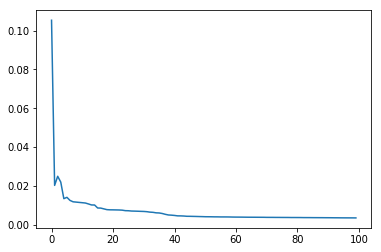

In [9]:
evr.plot()

In [10]:
1-evr.sum()

0.2853942933232655

In [11]:
df = pd.concat([df, pd.DataFrame(tfidf_reduced)], axis=1)
df.head()

,sentiment,date,tweet,score,0,1,2,3,4,5,...,90,91,92,93,94,95,96,97,98,99
0,NaN,NaN,NaN,NaN,0.004226,0.100904,-0.005942,0.140583,0.066988,-0.005676,...,-0.093137,0.061159,-0.054413,0.045821,-0.126615,-0.024724,-0.077025,-0.004301,-0.038125,-0.080263
1,|negative|,2019-02-11,b RT shadownomics There is no such thing as...,-1.0,0.812138,-0.012455,-0.003893,-0.007397,-0.012624,0.001599,...,-0.002050,0.001250,0.001780,0.004271,0.000171,-0.005292,-0.000432,-0.000197,0.000652,0.000560
2,NaN,NaN,NaN,NaN,0.012332,0.042987,-0.000168,0.000177,0.042983,-0.006323,...,0.003625,-0.001461,-0.005353,-0.000355,0.006541,0.009740,0.000903,0.001890,0.007119,-0.005651
3,|positive|,2019-02-11,b Join RobinhoodApp and we ll both get a sto...,4.0,0.812138,-0.012455,-0.003894,-0.007397,-0.012624,0.001599,...,-0.001813,0.001978,0.001651,0.005068,0.000679,-0.005840,-0.000465,-0.000479,0.000821,0.000336
4,|negative|,2019-02-11,b RT SeekingAlpha AAPL Apple Valentine ...,-1.0,0.006604,0.053128,-0.003003,0.026623,0.094276,-0.012314,...,-0.045294,-0.015858,0.043839,-0.035746,0.024408,0.030885,-0.032174,0.091432,0.002969,0.035980


In [28]:
k = 17
ix = [0,1,2,3,4,5,-5,-4,-3,-2,-1]
current_df = df.sort_values(k, ascending=False).dropna().iloc[ix,:][['tweet', 'sentiment', k]].round(2)
display(current_df)
current_df.to_csv(index=False)
#print(list(current_df.columns.names))
#for ix in range(10):
#    print(current_df.tweet[ix])
#    print('----------')
#    print(df.sentiment[ix]+' - '+df['0'][ix])
#    print('----------')
    


,tweet,sentiment,17
246,b 2015 was as good as it got for Apple in Chi...,|positive|,0.35
105,b RT Sandro_power Are you losing in the mar...,|positive|,0.35
244,b AAPL Daily AAPL got shut down dead in it...,|negative|,0.34
203,b RT Sandro_power Are you tired of missing ...,|positive|,0.14
159,b BadarianSalaam Join RobinhoodApp and we l...,|positive|,0.09
133,b Blessed day in the market Market was stron...,|positive|,0.09
72,b Apple xe2 x80 x99s Next Big Thing Could Be ...,|positive|,-0.29
71,b With past performance like this how can yo...,|positive|,-0.29
24,b Join RobinhoodApp and we ll both get a sto...,|positive|,-0.33
28,b Join RobinhoodApp and we ll both get a sto...,|positive|,-0.33


'tweet,sentiment,17\nb  2015 was as good as it got for Apple in China   AAPL xc2 xa0 https   t co HDfjD8j3B6 ,|positive|,0.35\nb  RT  Sandro_power  Are you losing in the markets when you should be making great gains  Do you sell to quickly then watch you gains fly high xe2 x80 xa6 ,|positive|,0.35\nb   AAPL Daily   AAPL got shut down dead in its tracks at 175  A failure to reach 200MA is very bearish signal  Since xe2 x80 xa6 https   t co 6Nj3Mxyg8Q ,|negative|,0.34\nb  RT  Sandro_power  Are you tired of missing great gains in the markets  Do you want to feel confident and make money instead  Live Steam Ton xe2 x80 xa6 ,|positive|,0.14\nb   BadarianSalaam Join  RobinhoodApp and we ll both get a stock like  AAPL   F  or  S for free  Make sure to use my l xe2 x80 xa6 https   t co WidhzeLuab ,|positive|,0.09\nb  Blessed day in the market  Market was strong  Can catch really strong moves  amp  hold on as it grinds or pops higher o xe2 x80 xa6 https   t co thv2aORLie ,|positive|,0.09\nb  Ap

In [20]:
attributes = pd.DataFrame(tfidf_reduced)
target = df.sentiment.dropna()
Tree = tree.DecisionTreeClassifier(max_depth=3)
Tree.fit(attributes,target)
type(target)

pandas.core.series.Series

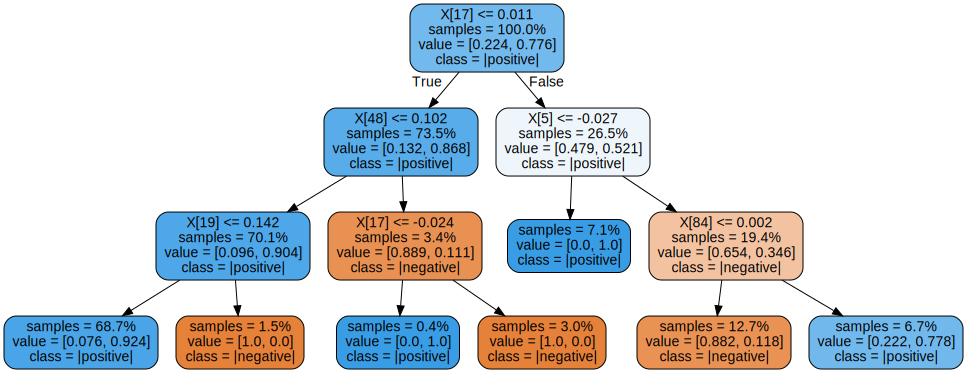

In [21]:
dot_data = tree.export_graphviz(Tree,
                               out_file = None,
                               class_names = df.sentiment.cat.categories,
                               proportion=True,
                               impurity = False,
                               filled = True,
                               rounded = True)
graph = graphviz.Source(dot_data)
graph